# CO2 Emissions and the Kyoto Protocol

This notebook explores the impact of the Kyoto Protocol on CO₂ emissions and climate change trends. Adopted in 1997 and enforced from 2005, the Kyoto Protocol was the first international treaty to set legally binding targets for greenhouse gas reductions in developed countries.

Using historical and projected climate data, this analysis aims to determine whether there is measurable evidence that the Kyoto Protocol contributed to reducing CO₂ emissions—globally and within key regions like Europe. By comparing emission trends before and after Kyoto's enforcement, and examining the outcomes, we seek to evaluate the treaty's effectiveness as a climate mitigation tool.

## Data loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_root = './data/'
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')
df_climate = pd.read_csv(f'{data_root}Climate_Indicators_Annual_Mean_Global_Surface_Temperature.csv')

As the dataset included information on countries worldwide, we decided to narrow our focus to a more manageable scope by analyzing data specifically related to European countries.

The temperature data represents the anomaly, or change, relative to the average climate conditions during the baseline period from 1951 to 1980, highlighting the difference in temperature compared to that historical reference.

In [3]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

In [4]:
row = df_co2_europe[df_co2_europe['Name'] == 'Serbia and Montenegro'].copy()

serbia_row = row.copy()
montenegro_row = row.copy()

serbia_row['Country_code'] = 'SRB'
serbia_row['Name'] = 'Serbia'

montenegro_row['Country_code'] = 'MNE'
montenegro_row['Name'] = 'Montenegro'

year_columns = [col for col in df_co2_europe.columns if col.isdigit()]

# Split the CO2 data by 85% and 15% because Serbia is much bigger than Montenegro by area and by population
serbia_row[year_columns] = row[year_columns] * 0.96
montenegro_row[year_columns] = row[year_columns] * 0.04

# Drop the original Serbia and Montenegro row
df_co2_europe = df_co2_europe[df_co2_europe['Name'] != 'Serbia and Montenegro']

# Append the two new rows
df_co2_europe = pd.concat([df_co2_europe, serbia_row, montenegro_row], ignore_index=True)

In [5]:
europe_iso3 = [
    # Modern European countries
    'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE',
    'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA',
    'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD',
    'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP',
    'SWE', 'CHE', 'UKR', 'GBR', 'VAT', 'XKX',  # XKX = Kosovo

    # Historical/legacy European ISO3 codes
    'CSK',  # Czechoslovakia
    'YUG',  # Yugoslavia
    'SUN',  # Soviet Union
]

df_climate_europe = df_climate[df_climate['ISO3'].isin(europe_iso3)]
print(df_climate_europe['Country'])
print(df_climate_europe['Country'].nunique())

2                            Albania
6           Andorra, Principality of
15                           Austria
21                  Belarus, Rep. of
22                           Belgium
27            Bosnia and Herzegovina
32                          Bulgaria
52                  Croatia, Rep. of
54                            Cyprus
55                        Czech Rep.
56                           Denmark
65                  Estonia, Rep. of
72                           Finland
73                            France
78                           Germany
81                            Greece
91                          Holy See
93                           Hungary
94                           Iceland
99                           Ireland
102                            Italy
114                           Latvia
119                    Liechtenstein
120                        Lithuania
121                       Luxembourg
127                            Malta
135                 Moldova, Rep. of
1

Both datasets are filtered for Europe.

## Visualizations 

We'll begin by examining basic trends in CO₂ emissions and climate change over the years to gain a clear understanding of how these two key factors have evolved over time.

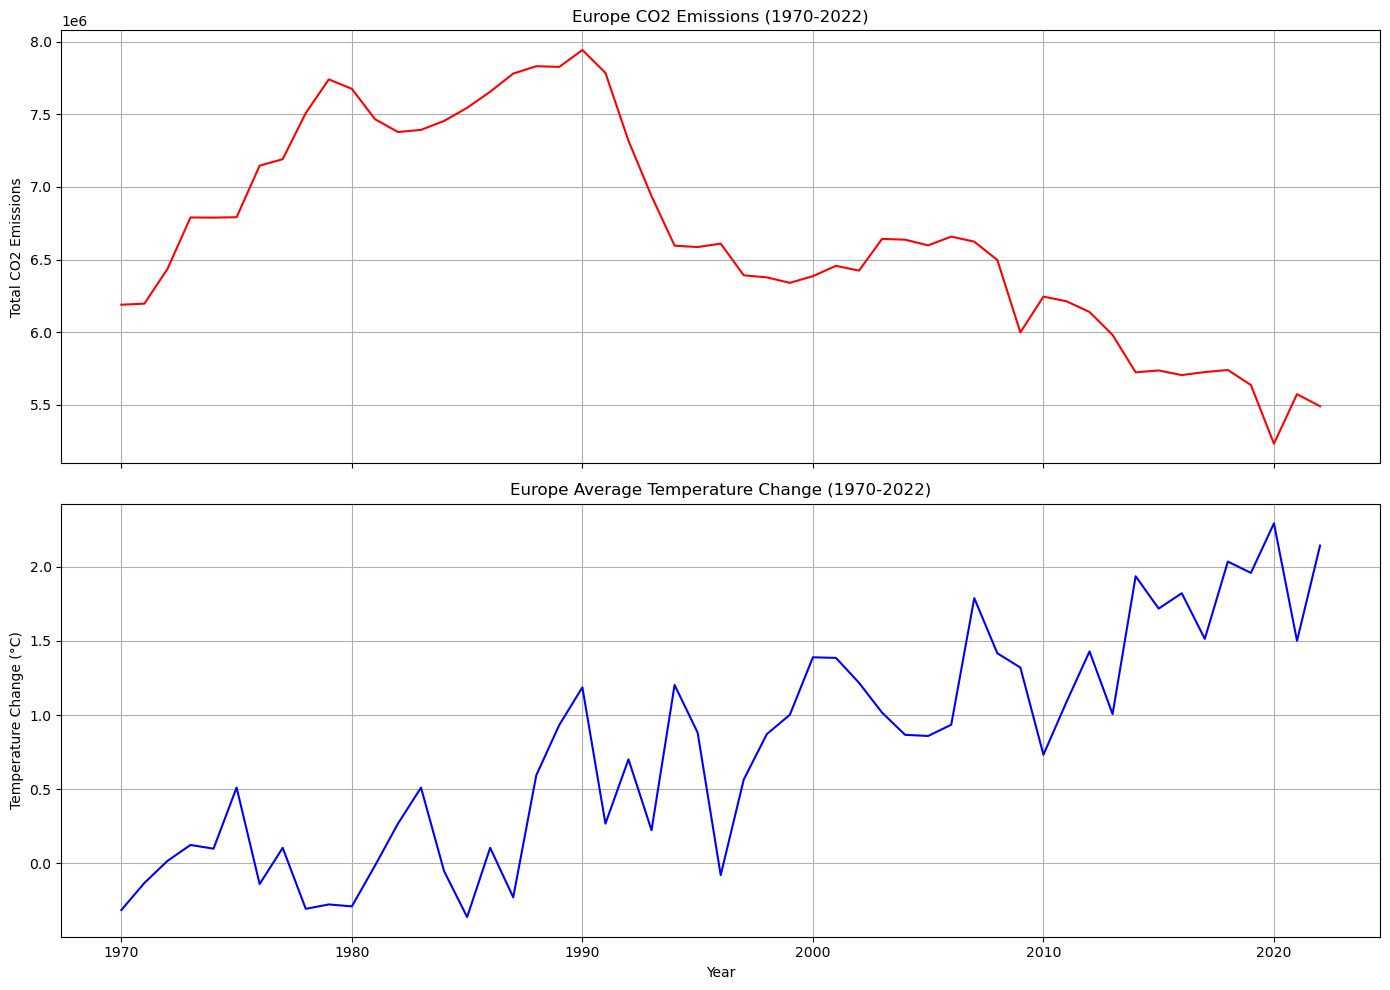

In [6]:
import matplotlib.pyplot as plt

years = [str(year) for year in range(1970, 2023)]

# Filter climate data
climate_celsius = df_climate_europe[df_climate_europe['Unit'] == 'Degree Celsius']
selected_indicator = 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'
selected_climate_data = climate_celsius[climate_celsius['Indicator'] == selected_indicator]

climate_values = selected_climate_data[years].apply(pd.to_numeric, errors='coerce')
climate_yearly_avg = climate_values.mean()

co2_yearly_sum = df_co2_europe[years].sum()

x_ticks = [int(year) for year in range(1970, 2023, 10)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# CO2 emissions plot
ax1.plot(co2_yearly_sum.index.astype(int), co2_yearly_sum.values, color='red')
ax1.set_ylabel('Total CO2 Emissions')
ax1.set_title('Europe CO2 Emissions (1970-2022)')
ax1.grid(True)
ax1.set_xticks(x_ticks)

# Temperature change plot
ax2.plot(climate_yearly_avg.index.astype(int), climate_yearly_avg.values, color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature Change (°C)')
ax2.set_title('Europe Average Temperature Change (1970-2022)')
ax2.grid(True)
ax2.set_xticks(x_ticks)

plt.tight_layout()
plt.show()

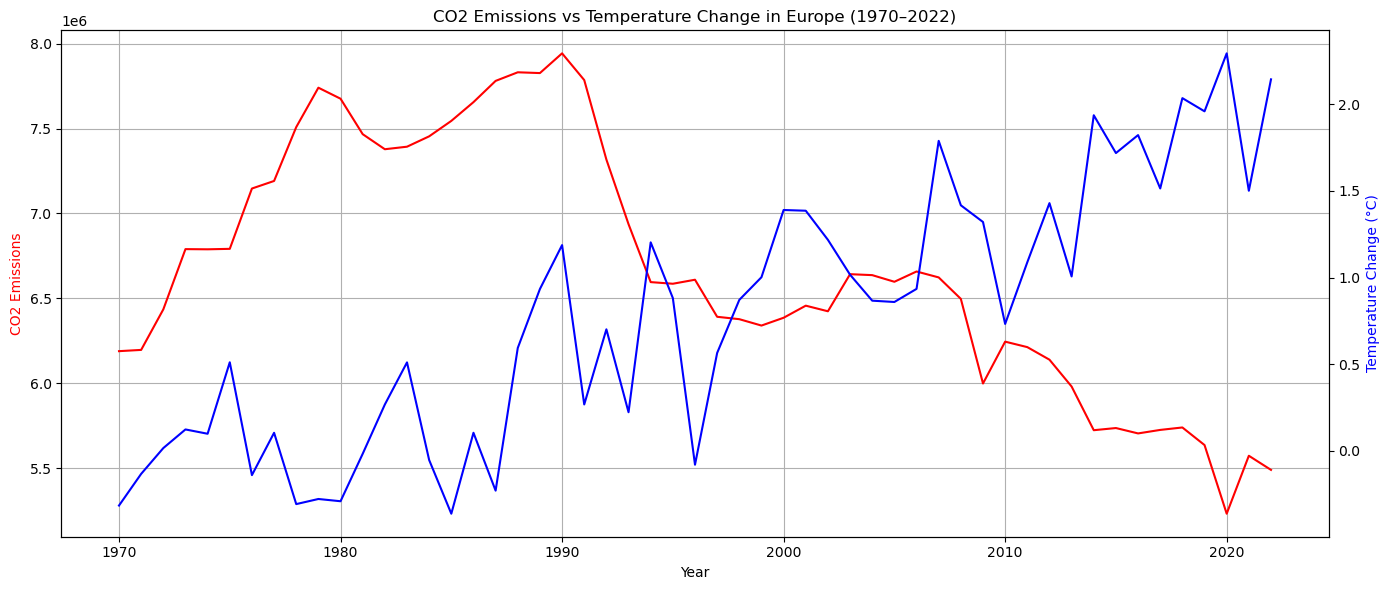

In [7]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax2 = ax1.twinx()
ax1.plot(co2_yearly_sum.index.astype(int), co2_yearly_sum.values, 'r-', label='CO2 Emissions')
ax2.plot(climate_yearly_avg.index.astype(int), climate_yearly_avg.values, 'b-', label='Temperature Change')

ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions', color='r')
ax2.set_ylabel('Temperature Change (°C)', color='b')
ax1.set_title('CO2 Emissions vs Temperature Change in Europe (1970–2022)')
ax1.set_xticks([int(y) for y in range(1970, 2023, 10)])
ax1.grid(True)

fig.tight_layout()
plt.show()

### CO2 Change
- 1970 to 1990: CO2 emissions steadily increased, likely due to industrial growth and higher fossil fuel consumption.
- 1990 to 2022: Emissions began to decline, especially after 2005, coinciding with environmental policies like the Kyoto Protocol and EU climate initiatives.

### Temperature Change
- The graph is spikey with year-to-year fluctuations — this is normal and expected because:
    - Climate is influenced by natural variability.
    - Individual years may show cooler or warmer anomalies due to short-term factors.
- Despite short-term dips, the overall trend is upward, indicating long-term warming consistent with global climate change.
- Sharp increases in the 2010s–2020s align with rising global average temperatures.

## Normalizing Data Using Cumulative CO2 Emissions

To better understand the relationship between CO₂ emissions and climate change, we applied data normalization by calculating the cumulative CO₂ emissions over time.

#### Why Normalize?
Annual CO₂ emissions data alone doesn’t fully explain global temperature rise, since:
- Temperature responds to the total accumulated CO₂ in the atmosphere.
- CO₂ builds up and persists over decades, continuing to affect the climate.

So, we normalized the emissions by computing the running total (cumulative sum) year by year, which better reflects the true climatic impact.

While not all emitted CO₂ stays in the atmosphere (about 50% is absorbed by oceans, forests, and soil), a large enough portion remains to cause significant warming.
For simplicity and consistency with most climate data analyses:
- We used total cumulative emissions.
- But we acknowledge that a more accurate model would factor in CO₂ sinks, which absorb part of the emissions over time.

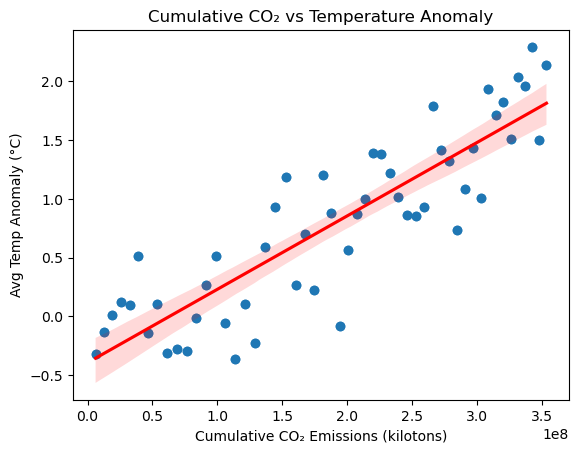

In [8]:
# Cumulative emissions
co2_total = df_co2_europe.loc[:, "1970":"2022"].sum()
co2_cumulative = co2_total.cumsum()

# Average climate
climate_total = df_climate_europe.loc[:, "1970":"2022"].mean()

# Plot with proper correlation
plt.scatter(co2_cumulative, climate_total)
sns.regplot(x=co2_cumulative, y=climate_total, scatter=True, line_kws={'color': 'red'})
plt.xlabel("Cumulative CO₂ Emissions (kilotons)")
plt.ylabel("Avg Temp Anomaly (°C)")
plt.title("Cumulative CO₂ vs Temperature Anomaly")
plt.show()

The trendline going upward indicates that as cumulative CO₂ emissions increase, so does the average temperature anomaly in Europe.
The dots scattered around the line represent data points for each year — their proximity to the line shows how closely the data follows the general trend.

## Correlation

This is the Pearson correlation matrix, which shows how strongly two variables are related linearly.
- 1.0 = perfect positive correlation (as one goes up, the other goes up).
- -1.0 = perfect negative correlation (as one goes up, the other goes down).
- 0 = no linear relationship.

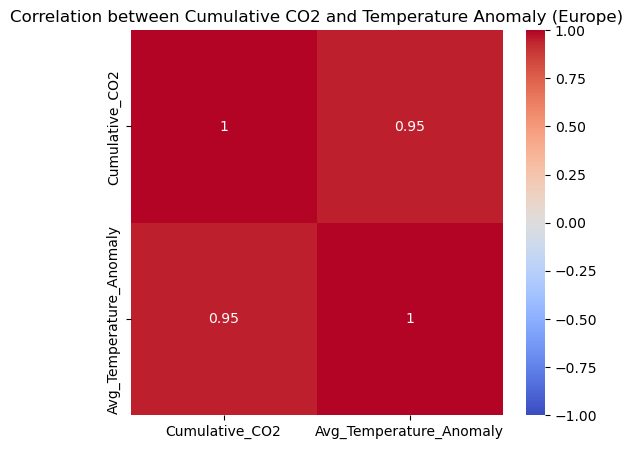

In [9]:
years = list(map(str, range(1970, 2023)))
co2_cumulative = df_co2[years].sum(axis=0).cumsum()

# average temperature anomaly for Europe for same years
temp_yearly_avg = df_climate.loc[
    df_climate['Indicator'] == 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980',
    years
].mean(axis=0)

# combine into one DataFrame for correlation
combined = pd.DataFrame({
    'Cumulative_CO2': co2_cumulative.values,
    'Avg_Temperature_Anomaly': temp_yearly_avg.values
}, index=years)

# correlation matrix
corr_matrix = combined.corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Cumulative CO2 and Temperature Anomaly (Europe)')
plt.show()

A correlation of 0.95 means there's a very strong positive linear relationship — as CO₂ accumulates, temperature rises almost proportionally.

## Kyoto Protocol 

The Kyoto Protocol was adopted in 1997 and came into force in 2005. Its first commitment period lasted from 2008 to 2012. There was also a second commitment period called the Doha Amendment covering 2013 to 2020, but it was less widely ratified.

So for climate/CO2 analysis, the key Kyoto Protocol timeline to consider is:
- Adoption: 1997
- Enforcement/start: 2005
- First commitment period: 2008–2012

We will analyze how CO₂ emissions and temperature changes in Europe behaved before, during, and after the Kyoto Protocol’s key periods—especially focusing on the first commitment period (2008–2012)—to assess whether the protocol’s enforcement corresponded with measurable changes or trends in emissions and temperature.

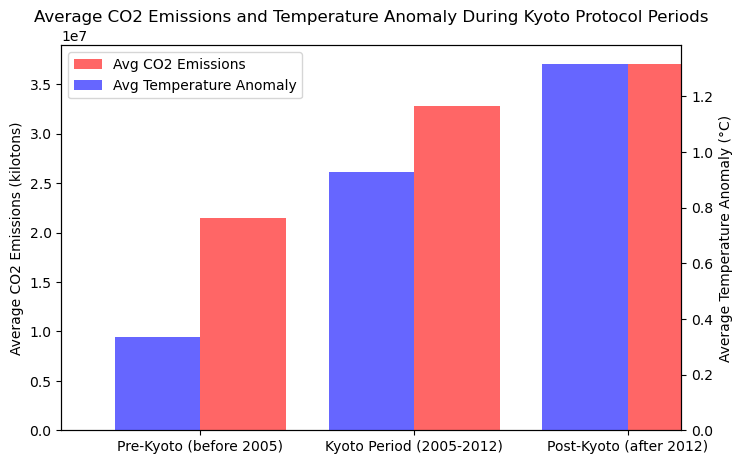

Average CO2 Emissions and Temperature Anomaly by Kyoto Protocol Period:
                          CO2_Emissions  Temperature_Anomaly
Pre-Kyoto (before 2005)    2.147816e+07             0.336089
Kyoto Period (2005-2012)   3.279739e+07             0.928506
Post-Kyoto (after 2012)    3.709836e+07             1.317424
                                  CO2_Emissions  Temperature_Anomaly
Pre-Kyoto to Kyoto % Change           52.701126           176.267471
Kyoto to Post-Kyoto % Change          13.113746            41.886459
Pre-Kyoto to Post-Kyoto % Change      72.725963           291.986132


In [10]:
# Define periods
periods = {
    'Pre-Kyoto (before 2005)': [str(y) for y in range(1970, 2005)],
    'Kyoto Period (2005-2012)': [str(y) for y in range(2005, 2013)],
    'Post-Kyoto (after 2012)': [str(y) for y in range(2013, 2023)],
}

# Calculate cumulative CO2 emissions per year
co2_yearly = df_co2[years].sum(axis=0)

# Average temperature anomaly per year
temp_yearly_avg = df_climate.loc[
    df_climate['Indicator'] == 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980',
    years
].mean(axis=0)

# Combining both
data = pd.DataFrame({
    'CO2_Emissions': co2_yearly.values,
    'Temperature_Anomaly': temp_yearly_avg.values
}, index=years)

# Function to calculate average values per period
def avg_by_period(df, periods_dict):
    avg_vals = {}
    for period_name, yrs in periods_dict.items():
        # Filter years that exist
        valid_years = [y for y in yrs if y in df.index]
        avg_vals[period_name] = df.loc[valid_years].mean()
    return pd.DataFrame(avg_vals).T

# averages for CO2 and temperature by period
period_avg = avg_by_period(data, periods)

fig, ax1 = plt.subplots(figsize=(8,5))

ax2 = ax1.twinx()
period_avg['CO2_Emissions'].plot(kind='bar', ax=ax1, color='red', alpha=0.6, position=0, width=0.4, label='Avg CO2 Emissions')
period_avg['Temperature_Anomaly'].plot(kind='bar', ax=ax2, color='blue', alpha=0.6, position=1, width=0.4, label='Avg Temperature Anomaly')

ax1.set_ylabel('Average CO2 Emissions (kilotons)')
ax2.set_ylabel('Average Temperature Anomaly (°C)')
ax1.set_xticklabels(period_avg.index, rotation=0)
ax1.set_title('Average CO2 Emissions and Temperature Anomaly During Kyoto Protocol Periods')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

plt.show()

#----------------------------------------------------------------------------------------------------------------

print("Average CO2 Emissions and Temperature Anomaly by Kyoto Protocol Period:")
print(period_avg)

def pct_change(start, end):
    return ((end - start) / start) * 100

# Calculate % changes between periods
change_pre_to_kyoto = pct_change(period_avg.loc['Pre-Kyoto (before 2005)'], period_avg.loc['Kyoto Period (2005-2012)'])
change_kyoto_to_post = pct_change(period_avg.loc['Kyoto Period (2005-2012)'], period_avg.loc['Post-Kyoto (after 2012)'])
change_pre_to_post = pct_change(period_avg.loc['Pre-Kyoto (before 2005)'], period_avg.loc['Post-Kyoto (after 2012)'])

pct_changes_between_periods = pd.DataFrame({
    'Pre-Kyoto to Kyoto % Change': change_pre_to_kyoto,
    'Kyoto to Post-Kyoto % Change': change_kyoto_to_post,
    'Pre-Kyoto to Post-Kyoto % Change': change_pre_to_post
}).T

print(pct_changes_between_periods)

### Pre-Kyoto
- The Pre-Kyoto to Kyoto period is pretty longer as it's 1970-2005 while the other periods are about 8+ years long, so the larger changes are expected.
- CO2 emissions increased substantially from Pre-Kyoto to the Kyoto period (~52.7% increase).
- Temperature anomaly (global temperature increase relative to baseline) more than doubled (~176%) in the same interval.

### Kyoto Period
- During the Kyoto Protocol’s first commitment period (2005–2012), CO2 emissions continued to rise but at a slower pace (~13.1% increase).
- The temperature anomaly also increased significantly (~41.9%), showing continued warming despite emissions growth slowing down.
- This suggests that although some emissions reductions efforts may have been in place, overall emissions still grew, contributing to further temperature increases.

### Post Kyoto
- After 2012, CO2 emissions rose further by around 13% compared to the Kyoto period, indicating ongoing challenges in reducing emissions globally.
- The temperature anomaly increased by about 41.9%, reflecting the cumulative effect of greenhouse gases already in the atmosphere.
- Overall, from Pre-Kyoto to Post-Kyoto, CO2 emissions rose about 72.7% and temperature anomaly nearly quadrupled (~292%), highlighting the urgency for stronger climate action.


### Same Time Periods

If we set the Post-Kyoto period the same length as other two, we get this:

In [11]:
periods_normalized = {
    'Pre-Kyoto (1997-2004)': [str(y) for y in range(1997, 2005)],
    'Kyoto (2005-2012)': [str(y) for y in range(2005, 2013)],
    'Post-Kyoto (2013-2022)': [str(y) for y in range(2013, 2023)],
}

period_avg_normalized = avg_by_period(data, periods_normalized)

print("Normalized Average CO2 Emissions and Temperature Anomaly:")
print(period_avg_normalized)

def pct_change(start, end):
    return ((end - start) / start) * 100

change_pre_to_kyoto = pct_change(period_avg_normalized.loc['Pre-Kyoto (1997-2004)'], period_avg_normalized.loc['Kyoto (2005-2012)'])
change_kyoto_to_post = pct_change(period_avg_normalized.loc['Kyoto (2005-2012)'], period_avg_normalized.loc['Post-Kyoto (2013-2022)'])
change_pre_to_post = pct_change(period_avg_normalized.loc['Pre-Kyoto (1997-2004)'], period_avg_normalized.loc['Post-Kyoto (2013-2022)'])

pct_changes_between_periods = pd.DataFrame({
    'Pre-Kyoto to Kyoto % Change': change_pre_to_kyoto,
    'Kyoto to Post-Kyoto % Change': change_kyoto_to_post,
    'Pre-Kyoto to Post-Kyoto % Change': change_pre_to_post
}).T

print(pct_changes_between_periods)

Normalized Average CO2 Emissions and Temperature Anomaly:
                        CO2_Emissions  Temperature_Anomaly
Pre-Kyoto (1997-2004)    2.613620e+07             0.797931
Kyoto (2005-2012)        3.279739e+07             0.928506
Post-Kyoto (2013-2022)   3.709836e+07             1.317424
                                  CO2_Emissions  Temperature_Anomaly
Pre-Kyoto to Kyoto % Change           25.486457            16.364164
Kyoto to Post-Kyoto % Change          13.113746            41.886459
Pre-Kyoto to Post-Kyoto % Change      41.942432            65.104991


- CO2 emissions increase from Pre-Kyoto to Kyoto is lower at 25.5%, and temperature anomaly rises by 16.4% — reflecting short-term trends over similar time spans, so changes appear less dramatic.
- Kyoto to Post-Kyoto shows the same increases as above since those periods are unchanged.
- From Pre-Kyoto to Post-Kyoto, the CO2 emissions increase is 41.9%, and temperature anomaly grows by 65.1%.

## Conclusion
There is a very strong link between CO₂ emissions and temperature — when emissions go up, the temperature also goes up.

Before the Kyoto Protocol (1970–2005), CO₂ emissions and temperatures increased a lot because there were no big rules to stop pollution. Emissions went up about 53%, and temperatures went up by 176%.

During the Kyoto Protocol period (2005–2012), emissions still went up but slower, about 13%. Temperatures also kept rising by around 42%. This shows that while Kyoto may have slowed down emissions growth a bit, it didn’t stop emissions from increasing or temperatures from rising.

After Kyoto (2013–2022), emissions went up another 13%, and temperatures increased by about 42% more. This means the world is still having trouble cutting emissions and slowing climate change.

When we compare periods of the same length (about 8 years), the increase in emissions and temperature before Kyoto looks smaller, but the trend is still the same — emissions and temperatures are rising.

##### In short, the Kyoto Protocol may have helped slow the growth of emissions a little, but it didn’t stop them from going up, and temperatures kept rising. We need stronger actions to really reduce emissions and fight climate change.